<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/MidTermExam_VietnameseCashes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries to preprocessing images
from os import listdir
from numpy import asarray, save
from keras.utils import img_to_array
from keras.utils import load_img

In [ ]:
# Access Drive Folder
import matplotlib.pyplot as plt
from matplotlib.image import imread 
folder = '/content/drive/MyDrive/AI Picture Datasets Resized/VietnameseCashDataset/'

In [ ]:
# Read the images and its name
photos, labels = list(), list()
for file in listdir(folder):
  output = 0

  if file.startswith('twoThousandFront'):
    output = 1

  if file.startswith('twoHundredThousandFront'):
    output = 2

  if file.startswith('twentyThousandFront'):
    output = 3

  if file.startswith('tenThousandFront'):
    output = 4

  if file.startswith('oneThousandFront'):
    output = 5
  
  if file.startswith('oneHundredThousandFront'):
    output = 6
  
  if file.startswith('fiveThousandFront'):
    output = 7

  if file.startswith('fiveHundredThousandFront'):
    output = 8  
  
  if file.startswith('fiveHundredFront'):
    output = 9  

  if file.startswith('fiftyThousandFront'):
    output = 10

# Load folder and preprocessing
  photo = load_img(folder + file, target_size = (400, 200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels =  asarray(labels)


In [ ]:
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_data_preprocessing/Midterm_VietnameseCash_photos.npy', photos)
save('/content/drive/MyDrive/AI_data_preprocessing/Midterm_VietnameseCash_labels.npy', labels)

(110, 400, 200, 3) (110,)


In [ ]:
#--------------------------/***/   PART TWO: TRAINING MODEL /***/--------------------------#

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy   
from sklearn.model_selection import train_test_split
# test the model with a custom image
from keras.utils import load_img, img_to_array
import numpy as np

In [ ]:
# load the preprocessed data
data = np.load('/content/drive/MyDrive/AI_data_preprocessing/Midterm_VietnameseCash_photos.npy')
labels = np.load('/content/drive/MyDrive/AI_data_preprocessing/Midterm_VietnameseCash_labels.npy')

In [ ]:
# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(88, 400, 200, 3)
(88,)
(22, 400, 200, 3)
(22,)


In [ ]:
x_train_reshape = x_train.reshape(88, 400, 200, 3)
train_reshape = x_train_reshape.astype('float32')/255

x_test_reshape = x_test.reshape(22, 400, 200, 3)
test_reshape = x_test_reshape.astype('float32')/255

# the to_cactagorical line must only run 1 time in a session

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), activation='relu', input_shape = (400, 200, 3), padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(
    (2,2), padding = 'same')
)

model.add(Conv2D(
    64, (3,3), activation = 'relu', padding = 'same'
))
model.add(Dropout(0.25))
model.add(MaxPooling2D(
    (2,2), padding = 'same')
)

model.add(Conv2D(
    128, (3,3), activation = 'relu', padding = 'same'
))
model.add(Dropout(0.25))
model.add(MaxPooling2D(
    (2,2), padding = 'same')
)

# The ANN
model.add(Flatten())
# Hidden layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(11, activation = 'Softmax'))

In [ ]:
# compile the model
model.compile(loss  = categorical_crossentropy, optimizer=Adam(), metrics = ['accuracy'])
# train the model
train = model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1)

Epoch 1/20
2/2 [==============================] - 25s 7s/step - loss: 284.9931 - accuracy: 0.1364
Epoch 2/20
2/2 [==============================] - 22s 5s/step - loss: 233.3336 - accuracy: 0.1023
Epoch 3/20
2/2 [==============================] - 23s 7s/step - loss: 43.6722 - accuracy: 0.2614
Epoch 4/20
2/2 [==============================] - 21s 5s/step - loss: 8.1465 - accuracy: 0.4886
Epoch 5/20
2/2 [==============================] - 27s 6s/step - loss: 3.4950 - accuracy: 0.5568
Epoch 6/20
2/2 [==============================] - 23s 6s/step - loss: 0.2628 - accuracy: 0.9432
Epoch 7/20
2/2 [==============================] - 23s 5s/step - loss: 0.1346 - accuracy: 0.9773
Epoch 8/20
2/2 [==============================] - 23s 7s/step - loss: 0.0436 - accuracy: 0.9886
Epoch 9/20
2/2 [==============================] - 22s 5s/step - loss: 0.1264 - accuracy: 0.9886
Epoch 10/20
2/2 [==============================] - 24s 8s/step - loss: 0.0361 - accuracy: 0.9773
Epoch 11/20
2/2 [=================

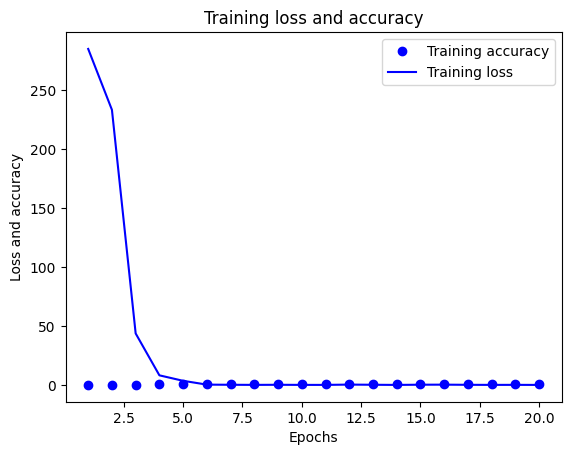

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
loss = train.history['loss']
accuracy = train.history['accuracy']

# Plot the training loss and accuracy curves
epochs = np.arange(1, 21)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss and accuracy')
plt.legend()
plt.show()

In [ ]:
# evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

NameError: ignored